# Определение перспективного тарифа для телеком-компании

Заказчик исследования: компании «Мегалайн» — федерального оператора сотовой связи. 

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Задача и данные: сделать предварительный анализ тарифов на небольшой выборке клиентов: данные по 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Загрузка данных и подготовка их к анализу.

В этом пункте загрузим необходимые датасеты, подготовим данные к их анализу: проверка типа, дубликатов, пропусков, дополнительные проверки, а так же рассчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

###  *Загрузить данные.*

In [1]:
#импорт библиотек

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math

In [2]:
#чтение файлов с данными и сохранение в соответствующую переменную
calls = pd.read_csv('/datasets/calls.csv') 
internet = pd.read_csv('/datasets/internet.csv') 
messages = pd.read_csv('/datasets/messages.csv') 
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

###  *Проверка типа данных.*

In [3]:
#информация о звонках
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Столбец 'call_date ' (дата звонка) - перевести в тип data.

In [5]:
# преобразование данных в тип data
time_format = '%Y-%m-%d'
calls['call_date'] = pd.to_datetime(calls['call_date'], format = time_format)

In [6]:
#проверка
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
#информация об интернет-сессиях
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Столбец 'session_date ' (дата интернет-сессии) - перевести в тип data.

In [9]:
# преобразование данных в тип data
time_format = '%Y-%m-%d'
internet['session_date'] = pd.to_datetime(internet['session_date'], format = time_format)

In [10]:
#проверка
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [11]:
#информация о сообщениях
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Столбец 'message_date ' (дата сообщения) - перевести в тип data.

In [13]:
# преобразование данных в тип data
time_format = '%Y-%m-%d'
messages['message_date'] = pd.to_datetime(messages['message_date'], format = time_format)

In [14]:
#проверка
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [15]:
#информация о тарифах
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


На первый взгляд тип данных соответствует описанию.

In [17]:
#информация о пользователях
users.head() 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Столбецы 'churn_date'(дата прекращения пользования тарифом), 'reg_date' (дата подключения тарифа (день, месяц, год)) - перевести в тип data.  

In [19]:
# преобразование данных в тип data
time_format = '%Y-%m-%d'
users['churn_date'] = pd.to_datetime(users['churn_date'], \
                                          format = time_format)
users['reg_date'] = pd.to_datetime(users['reg_date'], \
                                          format = time_format)

In [20]:
#проверка
users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Итак, все данные, содержащие информацию о датах, приведены к типу data.

### *Пропуски в датафреймах.*

Итак, по данным из метода info(), пропуски обнаружены в датафрейме users, что очевидно, так как в описании данных указано, что:если значение пропущено, то тариф ещё действовал на момент выгрузки данных. 

### *Дубликаты в датафреймах.*

In [21]:
#подсчет явных дубликатов
calls.duplicated().sum()

0

In [22]:
#подсчет явных дубликатов
internet.duplicated().sum()

0

In [23]:
#подсчет явных дубликатов
messages.duplicated().sum()

0

In [24]:
#подсчет явных дубликатов
tariffs.duplicated().sum()

0

In [25]:
#подсчет явных дубликатов
users.duplicated().sum()

0

Таким образом, дубликатов в данных не обнаружено.

### *Дополнительные проверки данных.*

#### Проверим категориальные переменные на корректность их написание.

In [26]:
tariffs['tariff_name'].value_counts()

smart    1
ultra    1
Name: tariff_name, dtype: int64

In [27]:
pd.DataFrame(users['city'].value_counts())

,city
Москва,99
Санкт-Петербург,39
Новосибирск,16
Омск,14
Казань,14
...,...
Химки,1
Подольск,1
Иваново,1
Нижневартовск,1


In [28]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Проверка категорийных данных показала отсутсвие описок или ошибок в них.

#### Проверка численных данных.

Для численных данных посмотрим на их статистические показали и проверим их на наличие каких-то ошибок или аномалий 

In [29]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Данные таблицы calls сомнений не вызывают.

In [30]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Данные таблицы internet сомнений не вызывают.

In [31]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [32]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Данные таблицы messages сомнений не вызывают.

In [33]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Данные таблицы users сомнений не вызывают.

Проверим количество уникальных пользователей в таблице users.

In [34]:
pd.DataFrame(users['user_id'].value_counts())

,user_id
1023,1
1194,1
1181,1
1182,1
1183,1
...,...
1362,1
1363,1
1364,1
1365,1


Получилось 500 уникальных пользователей - что соответствет описанию данных.

Итак, в данном пункте исследования были загружены основные данные и проведены следующие проверки:

1) Все данные, содержащие даты, переведены в тип дата.

2) Проверка наличия пропусков и дубликатов в данных показала их отсутствие, за исключением пропусков в таблице users в столбце 'churn date' - эти пропуски оговорены в описании данных.

3) Проверка категорийных данных показала отсутсвие описок или ошибок в них.

4) При проверке численных данных, на данном этапе исследования, так же не выявлено никаких аномалий.

### Расчеты по каждому пользователю.

#### Количество сделанных звонков и израсходованных минут разговора по месяцам.

In [35]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [36]:
# выделяем месяц 
calls['call_date_month'] = calls['call_date'].astype ('datetime64[M]')
calls

,id,call_date,duration,user_id,call_date_month
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01
3,1000_3,2018-09-21,13.80,1000,2018-09-01
4,1000_4,2018-12-15,5.18,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,2018-12-01
202603,1499_216,2018-10-18,18.83,1499,2018-10-01
202604,1499_217,2018-11-10,10.81,1499,2018-11-01
202605,1499_218,2018-10-06,4.27,1499,2018-10-01


In [37]:
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
calls.head(5)

,id,call_date,duration,user_id,call_date_month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01


In [38]:
#сгруппируем по пользователю и месяцу,
#и поситаем количество сделанных звонков и минут
#сбросим индексы
calls_month_user_2 = pd.DataFrame(calls.groupby(['user_id','call_date_month'])\
                                  [['duration']].agg(['count', 'sum'])\
                                  ).reset_index()
calls_month_user_2.head(12)    


user_id call_date_month duration     
                              count  sum
0     1000      2018-05-01       22  159
1     1000      2018-06-01       43  172
2     1000      2018-07-01       47  340
3     1000      2018-08-01       52  408
4     1000      2018-09-01       58  466
5     1000      2018-10-01       57  350
6     1000      2018-11-01       43  338
7     1000      2018-12-01       46  333
8     1001      2018-11-01       59  430
9     1001      2018-12-01       63  414
10    1002      2018-06-01       15  117
11    1002      2018-07-01       26  214

In [39]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [40]:
#объединим два датасета
calls_month_user_3 = calls_month_user_2.\
merge(users, on='user_id', how='inner')
calls_month_user_3.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,"(user_id, )","(call_date_month, )","(duration, count)","(duration, sum)",age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,1000,2018-05-01,22,159,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,1000,2018-06-01,43,172,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,1000,2018-07-01,47,340,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,1000,2018-08-01,52,408,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,1000,2018-09-01,58,466,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [41]:
#переименуем столбцы
calls_month_user_3.columns=['user_id', 'user_id_1', 'call_date_month', 'duration_count', \
                           'duration_sum', 'age', 'churn_date', 'city', 'first_name', 'last_name',\
                           'reg_date', 'tariff']
calls_month_user_3 = calls_month_user_3.drop('user_id_1',1)

In [42]:
calls_month_user_3.head()

,user_id,call_date_month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,22,159,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,43,172,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,47,340,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,52,408,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,58,466,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Подсчитаем выручку от "платных" минут (revenue_calls_per).

In [43]:
def revenue_calls_per (row):
    """
    функция, которая считает выручку с каждого пользователя:
    - если тариф "Ультра" и суммарное количество звонков больше 3000, то:
      revenue_calls_per = ((суммарное количество звонковм - бесплатный лимит звонков) * 1)
    - если тариф "Ультра" и суммарное количество звонков меньше или равно 3000, то: 
      revenue_calls_per = 0
    - если тариф "Смарт" и суммарное количество звонков больше 500, то: 
      revenue_calls_per = (суммарное количество звонковм - бесплатный лимит звонков) * 3) 
    - иначе:
      revenue_calls_per = 0
    """
    if (row['tariff'] == 'ultra' and row['duration_sum'] > 3000):
        return ((row['duration_sum'] - 3000) * 1)
    if (row['tariff'] == 'ultra' and row['duration_sum'] <= 3000):
        return 0
    if (row['tariff'] == 'smart' and row['duration_sum'] > 500):
        return ((row['duration_sum'] - 500) * 3)
    else:
        return 0
    
#создадим новый столбец с результатами работы функции 'revenue_calls'
calls_month_user_3['revenue_calls_per'] = calls_month_user_3\
.apply(revenue_calls_per, axis=1)
#выборочная проверка
calls_month_user_3.sample()

,user_id,call_date_month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per
1947,1310,2018-12-01,74,483,28,NaT,Уфа,Рудольф,Нестеров,2018-03-22,ultra,0


In [44]:
calls_month_user_3.columns = ['user_id', 'month', 'duration_count', 'duration_sum',\
'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',\
                              'tariff', 'revenue_calls_per']
calls_month_user_3.head(12)

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per
0,1000,2018-05-01,22,159,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,2018-06-01,43,172,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,2018-07-01,47,340,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,2018-08-01,52,408,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,2018-09-01,58,466,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000,2018-10-01,57,350,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000,2018-11-01,43,338,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000,2018-12-01,46,333,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1001,2018-11-01,59,430,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0
9,1001,2018-12-01,63,414,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0


In [45]:
calls_month_user_3.isna().sum()

user_id                 0
month                   0
duration_count          0
duration_sum            0
age                     0
churn_date           2987
city                    0
first_name              0
last_name               0
reg_date                0
tariff                  0
revenue_calls_per       0
dtype: int64

#### Количество отправленных сообщений по месяцам.

In [46]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [47]:
# выделяем месяц 
messages['message_date_month'] = messages['message_date'].astype ('datetime64[M]')
messages.head()

,id,message_date,user_id,message_date_month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [48]:
#сгруппируем по пользователю и месяцу,
#и поситаем количество сообщений
#сбросим индексы
messages_month_user_2 = pd.DataFrame(messages.groupby(['user_id','message_date_month'])\
                                  [['id']].agg(['count'])\
                                  ).reset_index()
messages_month_user_2.head(12)   

,user_id,message_date_month,id
,,,count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4


In [49]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [50]:
#объединим два датасета
messages_month_user_3 = messages_month_user_2.\
merge(users, on='user_id', how='left')
messages_month_user_3.head(12)

,user_id,"(user_id, )","(message_date_month, )","(id, count)",age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,1000,2018-05-01,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,1000,2018-06-01,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,1000,2018-07-01,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,1000,2018-08-01,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,1000,2018-09-01,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,1000,2018-10-01,73,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,1000,2018-11-01,58,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,1000,2018-12-01,70,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1002,1002,2018-06-01,4,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
9,1002,1002,2018-07-01,11,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [51]:
#переименуем столбцы
messages_month_user_3.columns=['user_id', 'user_id_1', 'message_date_month',\
                               'id_count',\
                           'age', 'churn_date', 'city', 'first_name', 'last_name',\
                           'reg_date', 'tariff']
messages_month_user_3 = messages_month_user_3.drop('user_id_1',1)
messages_month_user_3.head()

,user_id,message_date_month,id_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Подсчитаем выручку от "платные" сообщения (revenue_messages_per).

In [52]:
def revenue_messages_per (row):
    """
    функция, которая считает выручку с каждого пользователя:
    - если тариф "Ультра" и суммарное количество сообщений больше 1000, то:
      revenue_messagess_per = ((суммарное количество сообщений - бесплатный лимит звонков) * 1)
    - если тариф "Ультра" и суммарное количество сообщений меньше или равно 1000, то: 
      revenue_messages_per = 0
    - если тариф "Смарт" и суммарное количество сообщений больше 50, то: 
      revenue_messages_per = (суммарное количество звонковм - бесплатный лимит звонков) * 3) 
    - иначе:
      revenue_messages_per = 0
    """
    if (row['tariff'] == 'ultra' and row['id_count'] > 1000):
        return ((row['id_count'] - 1000) * 1)
    if (row['tariff'] == 'ultra' and row['id_count'] <= 1000):
        return 0
    if (row['tariff'] == 'smart' and row['id_count'] > 50):
        return ((row['id_count'] - 50) * 3)
    else:
        return 0
    
#создадим новый столбец с результатами работы функции 'revenue_messages_per'
messages_month_user_3['revenue_messages_per'] = messages_month_user_3\
.apply(revenue_messages_per, axis=1)
#выборочная проверка
messages_month_user_3.sample()

,user_id,message_date_month,id_count,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_messages_per
721,1135,2018-06-01,25,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart,0


In [53]:
messages_month_user_4 = messages_month_user_3[['user_id',\
                       'message_date_month', 'id_count', 'revenue_messages_per']]
messages_month_user_4.head()

,user_id,message_date_month,id_count,revenue_messages_per
0,1000,2018-05-01,22,0
1,1000,2018-06-01,60,0
2,1000,2018-07-01,75,0
3,1000,2018-08-01,81,0
4,1000,2018-09-01,57,0


In [54]:
messages_month_user_4.columns = ['user_id','month','id_count', 'revenue_messages_per']
messages_month_user_4.head(12)

,user_id,month,id_count,revenue_messages_per
0,1000,2018-05-01,22,0
1,1000,2018-06-01,60,0
2,1000,2018-07-01,75,0
3,1000,2018-08-01,81,0
4,1000,2018-09-01,57,0
5,1000,2018-10-01,73,0
6,1000,2018-11-01,58,0
7,1000,2018-12-01,70,0
8,1002,2018-06-01,4,0
9,1002,2018-07-01,11,0


In [55]:
messages_month_user_4.isna().sum()

user_id                 0
month                   0
id_count                0
revenue_messages_per    0
dtype: int64

#### Объем израсходованного интернет-трафика по месяцам.

In [56]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [57]:
# выделяем месяц 
internet['internet_data_month'] = internet['session_date'].astype ('datetime64[M]')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,internet_data_month
0,0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,2018-09-01


In [58]:
#сгруппируем по пользователю и месяцу,
#и поситаем количество объем израсходованного трафика в месяц в Мб
#сбросим индексы
internet_month_user_2 = pd.DataFrame(internet.groupby(['user_id','internet_data_month'])\
                                  [['mb_used']].agg(['sum'])\
                                  ).reset_index()
internet_month_user_2.head(12)   

,user_id,internet_data_month,mb_used
,,,sum
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91
5,1000,2018-10-01,14702.49
6,1000,2018-11-01,14756.47
7,1000,2018-12-01,9817.61
8,1001,2018-11-01,18429.34


In [59]:
#объединим два датасета
internet_month_user_3 = internet_month_user_2.\
merge(users, on='user_id', how='left')
internet_month_user_3.head(12)

,user_id,"(user_id, )","(internet_data_month, )","(mb_used, sum)",age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,1000,2018-05-01,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,1000,2018-06-01,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,1000,2018-07-01,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,1000,2018-08-01,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,1000,2018-09-01,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,1000,2018-10-01,14702.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,1000,2018-11-01,14756.47,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,1000,2018-12-01,9817.61,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,1001,2018-11-01,18429.34,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
9,1001,1001,2018-12-01,14036.66,41,NaT,Москва,Иван,Ежов,2018-11-01,smart


In [60]:
#переименуем столбцы
internet_month_user_3.columns=['user_id', 'user_id_1', 'internet_data_month',\
                               'mb_used_sum',\
                           'age', 'churn_date', 'city', 'first_name', 'last_name',\
                           'reg_date', 'tariff']
internet_month_user_3 = internet_month_user_3.drop('user_id_1',1)
internet_month_user_3.head()

,user_id,internet_data_month,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [61]:
#переведем Мб в Гб и округлим в большую сторону
internet_month_user_3['mb_used_sum'] = internet_month_user_3['mb_used_sum']\
.apply(lambda x:math.ceil(x / 1024))
internet_month_user_3.head(5)


,user_id,internet_data_month,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Подсчитаем выручку от "платный" тафик (revenue_internet_per).

In [62]:
def revenue_internet_per (row):
    """
    функция, которая считает выручку с каждого пользователя:
    - если тариф "Ультра" и суммарный объем трафика больше 30, то:
      revenue_internet_per = ((суммарный объем трафика - бесплатный лимит трафика) * 150)
    - если тариф "Ультра" и суммарный объем трафика меньше или равно 30, то: 
      revenue_internet_per = 0
    - если тариф "Смарт" и суммарный объем трафика больше 15, то: 
      revenue_internet_per  = (суммарный объем трафика - бесплатный лимит трафика) * 200) 
    - иначе:
      revenue_internet_per = 0
    """
    if (row['tariff'] == 'ultra' and row['mb_used_sum'] > 30):
        return (((row['mb_used_sum']) - 30) * 150)
    if (row['tariff'] == 'ultra' and (row['mb_used_sum']) <= 30):
        return 0
    if (row['tariff'] == 'smart' and (row['mb_used_sum']) > 15):
        return (((row['mb_used_sum']) - 15) * 200)
    else:
        return 0
    
#создадим новый столбец с результатами работы функции 'revenue_internet_per'
internet_month_user_3['revenue_internet_per'] = internet_month_user_3\
.apply(revenue_internet_per, axis=1)
#выборочная проверка
internet_month_user_3.sample()

,user_id,internet_data_month,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_internet_per
1760,1280,2018-08-01,16,53,NaT,Астрахань,Артемий,Худяков,2018-07-18,smart,200


In [63]:
#возьмем необходимые для анализа столбцы
internet_month_user_4 = internet_month_user_3[['user_id', 'internet_data_month',\
                        'mb_used_sum','revenue_internet_per']]
internet_month_user_4.head()

,user_id,internet_data_month,mb_used_sum,revenue_internet_per
0,1000,2018-05-01,3,0
1,1000,2018-06-01,23,0
2,1000,2018-07-01,14,0
3,1000,2018-08-01,14,0
4,1000,2018-09-01,15,0


In [64]:
#переименуем стобцы
internet_month_user_4.columns = ['user_id','month','mb_used_sum','revenue_internet_per']
internet_month_user_4.head()

,user_id,month,mb_used_sum,revenue_internet_per
0,1000,2018-05-01,3,0
1,1000,2018-06-01,23,0
2,1000,2018-07-01,14,0
3,1000,2018-08-01,14,0
4,1000,2018-09-01,15,0


In [65]:
internet_month_user_4.isna().sum()

user_id                 0
month                   0
mb_used_sum             0
revenue_internet_per    0
dtype: int64

In [66]:
#объединим таблицы
revenue_month_user_1 = pd.merge(calls_month_user_3, messages_month_user_4,how='outer',\
                                on = ['user_id', 'month'] )
revenue_month_user_1 .head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per
0,1000,2018-05-01,22.0,159.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,22.0,0.0
1,1000,2018-06-01,43.0,172.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,60.0,0.0
2,1000,2018-07-01,47.0,340.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,75.0,0.0
3,1000,2018-08-01,52.0,408.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,81.0,0.0
4,1000,2018-09-01,58.0,466.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,57.0,0.0


In [67]:
revenue_month_user_1.isna().sum()

user_id                    0
month                      0
duration_count            39
duration_sum              39
age                       39
churn_date              3026
city                      39
first_name                39
last_name                 39
reg_date                  39
tariff                    39
revenue_calls_per         39
id_count                 496
revenue_messages_per     496
dtype: int64

In [68]:
#объединим таблицы
revenue_month_user_2 = pd.merge(revenue_month_user_1, internet_month_user_4,how='outer', \
                                on = ['user_id', 'month'] )
revenue_month_user_2 .head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per
0,1000,2018-05-01,22.0,159.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,22.0,0.0,3.0,0.0
1,1000,2018-06-01,43.0,172.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,60.0,0.0,23.0,0.0
2,1000,2018-07-01,47.0,340.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,75.0,0.0,14.0,0.0
3,1000,2018-08-01,52.0,408.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,81.0,0.0,14.0,0.0
4,1000,2018-09-01,58.0,466.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,57.0,0.0,15.0,0.0


In [69]:
revenue_month_user_2.isna().sum()

user_id                    0
month                      0
duration_count            40
duration_sum              40
age                       40
churn_date              3027
city                      40
first_name                40
last_name                 40
reg_date                  40
tariff                    40
revenue_calls_per         40
id_count                 497
revenue_messages_per     497
mb_used_sum               11
revenue_internet_per      11
dtype: int64

Посчитаем общую выручку с одного абонента в месяц:

In [70]:
def revenue_users_month (row):
    """
    функция, которая считает выручку с каждого пользователя:
    - если тариф "Ультра", то:
      выручка = (абонентская плата по тарифу "Ультра"
                + выручка от "платных "звонков 
                + выручка от "платных" сообщений 
                + выручка от "платного" интернет-трафика)
    
    - если тариф "Смарт" , то: 
      выручка = (абонентская плата по тарифу "Смарт"
                + выручка от "платных "звонков 
                + выручка от "платных" сообщений 
                + выручка от "платного" интернет-трафика)
    """
    if (row['tariff'] == 'ultra'):
        return (1950 + row['revenue_calls_per'] + row['revenue_messages_per'] \
                + row['revenue_internet_per'])
    if (row['tariff'] == 'smart'):
        return (550 + row['revenue_calls_per'] + row['revenue_messages_per'] \
                + row['revenue_internet_per'])
   
    
#создадим новый столбец с результатами работы функции 'revenue_users_month'
revenue_month_user_2 ['revenue_users_month'] = revenue_month_user_2\
        .apply(revenue_users_month, axis=1)
revenue_month_user_2.head()


,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per,revenue_users_month
0,1000,2018-05-01,22.0,159.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,22.0,0.0,3.0,0.0,1950.0
1,1000,2018-06-01,43.0,172.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,60.0,0.0,23.0,0.0,1950.0
2,1000,2018-07-01,47.0,340.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,75.0,0.0,14.0,0.0,1950.0
3,1000,2018-08-01,52.0,408.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,81.0,0.0,14.0,0.0,1950.0
4,1000,2018-09-01,58.0,466.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,57.0,0.0,15.0,0.0,1950.0


In [71]:
revenue_month_user_2.isna().sum()

user_id                    0
month                      0
duration_count            40
duration_sum              40
age                       40
churn_date              3027
city                      40
first_name                40
last_name                 40
reg_date                  40
tariff                    40
revenue_calls_per         40
id_count                 497
revenue_messages_per     497
mb_used_sum               11
revenue_internet_per      11
revenue_users_month      547
dtype: int64

Итак, необходимые датасеты загружены, данные подготовлены к их анализу, для каждого пользователя рассчитаны:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

## Анализ данных.

### Поведение клиентов оператора (исходя из выборки), в зависимости от тарифа.

#### Общие показатели анализа тарифов Смарт и Ультра.

Посмотрим долю количества абонентов двух тарифов.

In [72]:
#посчитаем количество абонентов
user_count = revenue_month_user_2.\
pivot_table(index = 'tariff', values = 'user_id', aggfunc ='nunique')
user_count

,tariff,user_id
tariff,,
smart,1,349
ultra,1,143


Text(0.5, 1.0, 'Количество абонентов в зависимости от тарифа')

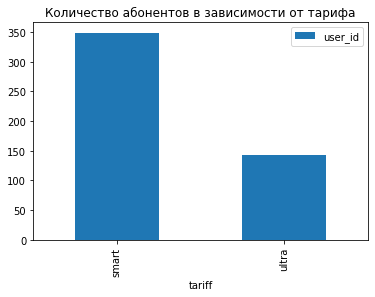

In [73]:
#построим гистограмму количества абонентов, в зависимости от тарифа
revenue_month_user_2.\
pivot_table(index = 'tariff', values = 'user_id', aggfunc ='nunique')\
.plot(y='user_id', kind='bar')
plt.title('Количество абонентов в зависимости от тарифа')

In [74]:
#посчитаем долю количества по каждому тарифу
301 / (301+118) # тариa Смарт


0.7183770883054893

In [75]:
118 / (301+118) # тариф Ультра

0.28162291169451076

Судя по графику видно, что в выборке тариф Смарт лидирует по количеству абонентов более чем в два раза. Смарт - 72%, Ультра - 28%.

Рассчитаем долю выручки по каждому тарифу.

In [76]:
#посчитаем количество абонентов
user_count = revenue_month_user_2.\
pivot_table(index = 'tariff', values = 'revenue_users_month', aggfunc ='sum')
user_count

,revenue_users_month
tariff,
smart,2471648.0
ultra,1540800.0


Text(0.5, 1.0, 'Количество абонентов в зависимости от тарифа')

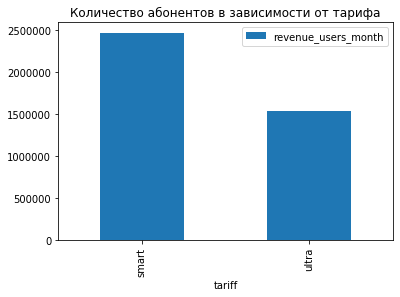

In [77]:
revenue_month_user_2.\
pivot_table(index = 'tariff', values = 'revenue_users_month', aggfunc ='sum').plot(y='revenue_users_month', kind='bar')
plt.title('Количество абонентов в зависимости от тарифа')

In [78]:
#Смарт
2184931.49 / (2184931.49 + 1527150.00)

0.5886000875481858

In [79]:
#Ультра
1527150.00 / (2184931.49 + 1527150.00)

0.4113999124518142

По доле выручки тариф Смарт (59%) так же выше тарифа Ультра (41%).

Разделим общую таблицу на две: для удобства в расчетах и анализе показателей отдельно по каждому тарифу.

In [80]:
ultra = revenue_month_user_2[revenue_month_user_2['tariff'] == 'ultra']
ultra.head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per,revenue_users_month
0,1000,2018-05-01,22.0,159.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,22.0,0.0,3.0,0.0,1950.0
1,1000,2018-06-01,43.0,172.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,60.0,0.0,23.0,0.0,1950.0
2,1000,2018-07-01,47.0,340.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,75.0,0.0,14.0,0.0,1950.0
3,1000,2018-08-01,52.0,408.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,81.0,0.0,14.0,0.0,1950.0
4,1000,2018-09-01,58.0,466.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,57.0,0.0,15.0,0.0,1950.0


In [81]:
smart = revenue_month_user_2[revenue_month_user_2['tariff'] != 'ultra']
smart.head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per,revenue_users_month
8,1001,2018-11-01,59.0,430.0,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,NaN,NaN,18.0,600.0,NaN
9,1001,2018-12-01,63.0,414.0,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,NaN,NaN,14.0,0.0,NaN
10,1002,2018-06-01,15.0,117.0,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,4.0,0.0,11.0,0.0,550.0
11,1002,2018-07-01,26.0,214.0,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,11.0,0.0,18.0,600.0,1150.0
12,1002,2018-08-01,42.0,289.0,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,13.0,0.0,20.0,1000.0,1550.0


Рассчитаем для пользователей тарифов Ультра и Смарт:

- количество минут разговора,
- количество сообщений,
- объём интернет-трафика,
- средняя выручка в месяц на одного пользователя

Посчитаем для этих показателей:
- среднее количество,
- медиану,
- дисперсию,
- стандартное отклонение.

И построим гистограммы.

#### КОЛИЧЕСТВО МИНУТ РАЗГОВОРА.

 - ТАРИФ УЛЬТРА

In [82]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение количества минут по тарифу Ультра 
ulta_duration_sum = ultra[['duration_sum']].agg(['mean', 'median', 'var', 'std'])
ulta_duration_sum

,duration_sum
mean,545.451104
median,528.000000
var,94203.418396
std,306.925754


In [83]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_duration_sum_ultra = 545.451104 + 2*306.925754
th_sigm_1_duration_sum_ultra

1159.302612

In [84]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_2_duration_sum_ultra = 545.451104 - 2*306.925754
th_sigm_2_duration_sum_ultra

-68.40040399999998

- ТАРИФ СМАРТ

In [85]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение количества минут по тарифу Смарт 
smart[['duration_sum']].agg(['mean', 'median', 'var', 'std'])


,duration_sum
mean,419.062978
median,423.000000
var,35844.189551
std,189.325618


In [86]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_duration_sum_smart = 419.062978 + 2*189.325618
th_sigm_1_duration_sum_smart

797.714214

In [87]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_2_duration_sum_smart = 419.062978 - 2*189.325618
th_sigm_2_duration_sum_smart

40.411742000000004

Text(0.5, 1.0, 'Кол-во минут разговора по тарифам Ультра и Смарт')

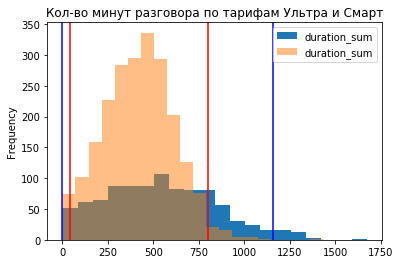

In [88]:
#построим гистаграммы по тарифу Ультра и Смарт
ultra['duration_sum'].plot(bins = 20, alpha=1, kind='hist', legend=True)
smart['duration_sum'].plot(bins = 20, alpha=0.5, kind='hist', legend=True)
plt.axvline(40.411742000000004, color='red')
plt.axvline(797.714214, color='red')
plt.axvline(1159.302612, color='blue')
plt.axvline(0, color='blue')
plt.title('Кол-во минут разговора по тарифам Ультра и Смарт')

Тариф Ультра:
- Среднее значение и медиана практически равны, поэтому распределение кол-ва минут разговора  можно считать нормальным. 
- 96% всех значений попадает в промежуток от 0 до 1159 минут разговора.

Тариф Смарт:
- Среднее значение меньше медиана  так же практически равны, поэтому распределение кол-ва минут разговора можно считать нормальным. 
- 96% всех значений попадает в промежуток от 40 до 797 мин.

#### КОЛИЧЕСТВО СООБЩЕНИЙ РАЗГОВОРА. 

 - ТАРИФ УЛЬТРА

In [89]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение количества cooбщений по тарифу Ультра 
ulta_count_sum = ultra[['id_count']].agg(['mean', 'median', 'var', 'std'])
ulta_count_sum

,id_count
mean,61.195538
median,52.000000
var,1999.574067
std,44.716597


In [90]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_count_sum_ultra = 61.195538 + 2*44.716597
th_sigm_1_count_sum_ultra

150.628732

In [91]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_2_count_sum_ultra = 61.195538 - 2*44.716597
th_sigm_2_count_sum_ultra

-28.237656

- ТАРИФ СМАРТ

In [92]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение количества cooбщений по тарифу Ультра 
smart_count_sum = smart[['id_count']].agg(['mean', 'median', 'var', 'std'])
smart_count_sum

,id_count
mean,39.081841
median,33.000000
var,791.746625
std,28.137993


In [93]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_count_sum_smart = 39.081841 + 2*28.137993
th_sigm_1_count_sum_smart

95.357827

In [94]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_count_sum_smart = 39.081841 - 2*28.137993
th_sigm_1_count_sum_smart

-17.194145000000006

Text(0.5, 1.0, 'Кол-во сообщений разговора по тарифам Ультра и Смарт')

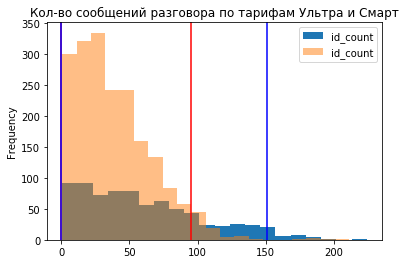

In [95]:
#построим гистаграммы
ultra['id_count'].plot(bins = 20, alpha=1, kind='hist', legend=True)
smart['id_count'].plot(bins = 20, alpha=0.5, kind='hist', legend=True)
plt.axvline(95.357827, color='red')
plt.axvline(0, color='red')
plt.axvline(150.628732, color='blue')
plt.axvline(0, color='blue')
plt.title('Кол-во сообщений разговора по тарифам Ультра и Смарт')

Тариф Ультра:
- Среднее значение больше медиана  - распределение кол-ва сообщений смещено вправо. 
- 96% всех значений попадает в промежуток от 0 до 151 сообщений.

Тариф Смарт:
- Среднее значение больше медиана  - распределение количества минут разговора смещено вправо. 
- 96% всех значений попадает в промежуток от 0 до 95 сообщений.

#### ОБЪЕМ ИНТЕРНЕТ-ТРАФИКА. 

- ТАРИФ УЛЬТРА

In [96]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение объем интернет-трафика по тарифу Ультра 
ulta_mb_used_sum = ultra[['mb_used_sum']].agg(['mean', 'median', 'var', 'std'])
ulta_mb_used_sum

,mb_used_sum
mean,19.695005
median,19.000000
var,94.778156
std,9.735407


In [97]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_mb_used_sum_ultra = 19.695005 + 2*9.735407
th_sigm_1_mb_used_sum_ultra

39.165819

In [98]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_2_mb_used_sum_ultra = 19.695005 - 2*9.735407
th_sigm_2_mb_used_sum_ultra

0.2241909999999976

- ТАРИФ СМАРТ

In [99]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение объем интернет-трафика по тарифу Ультра 
smart_mb_used_sum = smart[['mb_used_sum']].agg(['mean', 'median', 'var', 'std'])
smart_mb_used_sum

,mb_used_sum
mean,16.386384
median,17.000000
var,33.747148
std,5.809230


In [100]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_mb_used_sum_smart = 16.386384 + 2*5.809230
th_sigm_1_mb_used_sum_smart

28.004844

In [101]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_1_mb_used_sum_smart = 16.386384 - 2*5.809230
th_sigm_1_mb_used_sum_smart

4.767923999999999

Text(0.5, 1.0, 'Кол-во объема интернет-трафика по тарифам Ультра и Смарт')

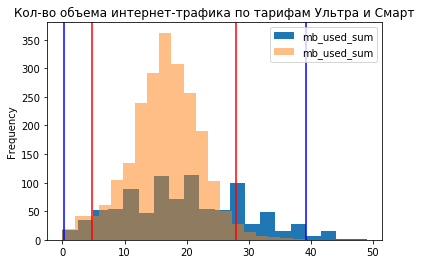

In [102]:
#построим гистаграммы
ultra['mb_used_sum'].plot(bins = 20, alpha=1, kind='hist', legend=True)
smart['mb_used_sum'].plot(bins = 20, alpha=0.5, kind='hist', legend=True)
plt.axvline(28.004844, color='red')
plt.axvline(4.767923999999999, color='red')
plt.axvline(39.165819, color='blue')
plt.axvline(0.2241909999999976, color='blue')
plt.title('Кол-во объема интернет-трафика по тарифам Ультра и Смарт')

Тариф Ультра:
- Среднее значение среднего и медиана примерно одинаковые - распределение объема интернет-трафика нормальное.
- 96% всех значений попадает в промежуток от 0 до 39 Гб интернет-трафика.

Тариф Смарт:
- Среднее значение немного меньше медиана  - распределение  объема интернет-трафика смещено влево. 
- 96% всех значений попадает в промежуток от 5 до 28 Гб интернет-трафика.

#### СРЕДНЯЯ ВЫРУЧКА НА ОДНОГО ПОЛЬЗОВАТЕЛЯ В МЕСЯЦ. 

- ТАРИФ УЛЬТРА.

In [103]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение выручки по тарифу Ультра 
ulta_revenue_sum = ultra[['revenue_users_month']].agg(['mean', 'median', 'var', 'std'])
ulta_revenue_sum

,revenue_users_month
mean,2048.936170
median,1950.000000
var,110817.774882
std,332.893038


In [104]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_revenue_sum_ultra = 2048.936170 + 2*332.893038
th_sigm_1_revenue_sum_ultra

2714.722246

In [105]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_2_revenue_sum_ultra = 2048.936170 - 2*332.893038
th_sigm_2_revenue_sum_ultra

1383.150094

- ТАРИФ СМАРТ.

In [106]:
# посчитаем среднее, медиану, дисперсию и стандартное отклонение выручки по тарифу Смарт 
smart_revenue_sum = smart[['revenue_users_month']].agg(['mean', 'median', 'var', 'std'])
smart_revenue_sum

,revenue_users_month
mean,1290.677807
median,1012.000000
var,677052.568551
std,822.832042


In [107]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений по тарифу Ультра
th_sigm_1_revenue_sum_smart = 1290.677807 + 2*822.832042
th_sigm_1_revenue_sum_smart

2936.341891

In [108]:
#подсчитаем по правилу трех сигм промежуток 96% всех значений 
th_sigm_2_revenue_sum_smart = 1290.677807 - 2*822.832042
th_sigm_2_revenue_sum_smart

-354.986277

Text(0.5, 1.0, 'Средняя выручка по тарифам Ультра и Смарт')

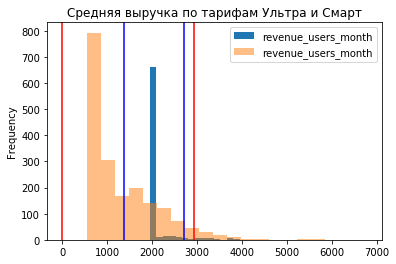

In [109]:
#построим гистаграммы
ultra['revenue_users_month'].plot(bins = 20, alpha=1, kind='hist', legend=True)
smart['revenue_users_month'].plot(bins = 20, alpha=0.5, kind='hist', legend=True)
plt.axvline(2936.341891, color='red')
plt.axvline(0, color='red')
plt.axvline(2714.722246, color='blue')
plt.axvline(1383.150094, color='blue')
plt.title('Средняя выручка по тарифам Ультра и Смарт')

Тариф Ультра:
- Среднее значение больше медиана  - распределение средней выручки на одного пользователя в месяц смещено вправо. 
- 96% всех значений попадает в промежуток от 1383 до 2714 руб.

Тариф Смарт:
- Среднее значение больше медиана  - распределение средней выручки на одного пользователя в месяц смещено вправо. 
- 96% всех значений попадает в промежуток от 0 до 2936 руб.

## Проверка гипотез.

### Гипотеза 1:
"Средняя выручка пользователей тарифа Ультра и Смарт различаются."
   

   

In [110]:
ultra.head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per,revenue_users_month
0,1000,2018-05-01,22.0,159.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,22.0,0.0,3.0,0.0,1950.0
1,1000,2018-06-01,43.0,172.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,60.0,0.0,23.0,0.0,1950.0
2,1000,2018-07-01,47.0,340.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,75.0,0.0,14.0,0.0,1950.0
3,1000,2018-08-01,52.0,408.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,81.0,0.0,14.0,0.0,1950.0
4,1000,2018-09-01,58.0,466.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,57.0,0.0,15.0,0.0,1950.0


In [111]:
#средняя выручка по тарифу Ультра
mean_revenue_users_month = ultra['revenue_users_month'].mean()
mean_revenue_users_month

2048.936170212766

In [112]:
#выведем данные по тарифу Смарт
smart.head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per,revenue_users_month
8,1001,2018-11-01,59.0,430.0,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,NaN,NaN,18.0,600.0,NaN
9,1001,2018-12-01,63.0,414.0,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,NaN,NaN,14.0,0.0,NaN
10,1002,2018-06-01,15.0,117.0,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,4.0,0.0,11.0,0.0,550.0
11,1002,2018-07-01,26.0,214.0,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,11.0,0.0,18.0,600.0,1150.0
12,1002,2018-08-01,42.0,289.0,59.0,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,13.0,0.0,20.0,1000.0,1550.0


In [113]:
#средняя выручка по тарифу Смарт
mean_revenue_users_month_2 = smart['revenue_users_month'].mean()
mean_revenue_users_month_2 

1290.6778067885118

Сравнивая два средних значения по выручки на одного пользователя по двум тарифам, видим, что этот показатель выше по тарифу Ультра. 

 - Проверим гипотезу: "Средняя выручка пользователей тарифа Ультра и Смарт различаются."
   
1) Сформулируем нулевую гипотезу (Н0): 

"Средняя выручка пользователей тарифа Ультра равна средней выручки пользователей тарифа Смарт."

2) Альтернативная гипотеза (Н1):

"Средняя выручка пользователей тарифа Ультра НЕ равна средней выручки пользователей тарифа Смарт."
   
   Н1 - двусторонняя гипотеза.
   

Для проверки гипотезы  равенстве среднего двух генеральных совокупностей по взятым из них выборкам воспользуемся специальным методом: st.ttest_ind  

In [114]:

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    ultra['revenue_users_month'], 
    smart['revenue_users_month'], equal_var = False, nan_policy = 'omit') 
#агрумент nan_policy = 'omit' дает возможность обойти nan

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.6111423096150572e-209
Отвергаем нулевую гипотезу


Итак, средняя выручка пользователей тарифа Ультра НЕ равна средней выручки пользователей тарифа Смарт."

### Гипотеза 2:

"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
1) Сформулируем нулевую гипотезу (Н0):

"Средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов."

2) Альтернативная гипотеза (Н1):

"Средняя выручка пользователей из Москвы НЕ равна средней выручки пользователей из других регионов."

Н1 - двусторонняя гипотеза.

In [115]:
revenue_month_user_2.head()

,user_id,month,duration_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue_calls_per,id_count,revenue_messages_per,mb_used_sum,revenue_internet_per,revenue_users_month
0,1000,2018-05-01,22.0,159.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,22.0,0.0,3.0,0.0,1950.0
1,1000,2018-06-01,43.0,172.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,60.0,0.0,23.0,0.0,1950.0
2,1000,2018-07-01,47.0,340.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,75.0,0.0,14.0,0.0,1950.0
3,1000,2018-08-01,52.0,408.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,81.0,0.0,14.0,0.0,1950.0
4,1000,2018-09-01,58.0,466.0,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,57.0,0.0,15.0,0.0,1950.0


- Найдем среднюю выручку пользователей из Москвы.

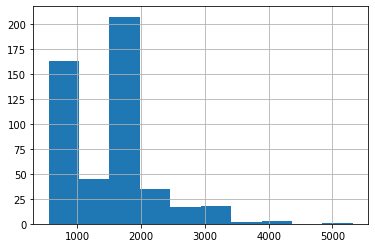

In [116]:
#Москва
revenue_month_user_2[revenue_month_user_2['city'] == 'Москва']\
['revenue_users_month'].hist()

In [117]:
#посчитаем среднюю выручку пользователей Москвы
Moscow = revenue_month_user_2[revenue_month_user_2['city'] == 'Москва']\
['revenue_users_month']
Moscow.mean() 

1554.7107942973523

- Найдем среднюю выручку пользователей из неМосквы.

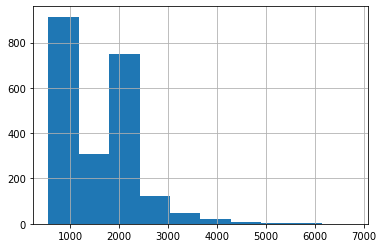

In [118]:
#неМосква
revenue_month_user_2[revenue_month_user_2['city'] != 'Москва']\
['revenue_users_month'].hist()


In [119]:
#посчитаем среднюю выручку пользователей неМосквы
no_Moscow = revenue_month_user_2[revenue_month_user_2['city'] != 'Москва']\
['revenue_users_month']
no_Moscow.mean()

1493.1456801470588

Сравнивая два средних значения по выручки на одного пользователя по пользователям из Москвы и других регионов, видим, что этот показатель незначительно выше у пользователей Москвы.

Проверим гипотезу 2: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
1) Сформулируем нулевую гипотезу (Н0):

"Средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов."

2) Альтернативная гипотеза (Н1):

"Средняя выручка пользователей из Москвы НЕ равна средней выручки пользователей из других регионов."

Н1 - двусторонняя гипотеза.
   

Для проверки гипотезы  равенстве среднего двух генеральных совокупностей по взятым из них выборкам воспользуемся специальным методом: st.ttest_ind :

In [120]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    Moscow, 
    no_Moscow, equal_var = False, nan_policy = 'omit') 
#агрумент nan_policy = 'omit' дает возможность обойти nan в данных

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.11142595553001099
Не получилось отвергнуть нулевую гипотезу


Итак, средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов. 

## Общий вывод.

Итак, в данном исследовании:

1. Были произведены расчеты:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков,       сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую         плату, соответствующую тарифному плану).
    
2.  При расчете общих показателей по предоставленной выборке абонентов пришли к результатам:

    - доля выручки по тарифу Смарт (59%) выше, чем по тарифу Ультра (41%);
    - по количеству абонентов тариф Смарт лидирует: Смарт - 72%, Ультра - 28%. 
    
3.  Расчеты таких характеристик:

- количество минут разговора,
- количество сообщений,
- объём интернет-трафика,
- средняя выручка в месяц на одного пользователя

    И:  
- среднее количество,
- медиану,
- дисперсию,
- стандартное отклонение.

для этих показателей, дали результат: лидер тут тариф Смарт.

4. Были проверены гипотезы, которые позволяют принять факты, что:
- средняя выручка пользователей тарифа Ультра НЕ равна средней выручки пользователей тарифа Смарт."
- средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов. 

РЕКОМЕНДАЦИИ:

Для более полного ответа коммерческому департаменту необходимо учесть не только выручку по абонентам каждого тарифа, но и расходы по ним. 

Исходя из предоставленных данных коммерческий департамент компании для корректировки рекламного бюджета может пойти по двум пути:
- вложить средства в уже "успешный" тариф Смарт,
- продумать стратегию по вложению средств на привлечение абонентов тарифа Ультра: более дорогого, но и более статусного. 